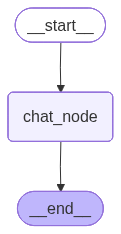

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver
load_dotenv()

class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

llm =ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_retries=2)

def chat_node(state: ChatState):

    messages = state['messages']
    response = llm.invoke(messages)
    return {'messages': [response]}

graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

checkpointer= MemorySaver()

chatbot = graph.compile(checkpointer=checkpointer)
chatbot


In [22]:

thread_id= '1'
while True:
    user_message= input('Ask anything:')
    print("User:", user_message)

    if user_message.lower().strip() in ['exit','bye','end']:
        break
    else:
        config= {"configurable":{"thread_id":thread_id}}
        response= chatbot.invoke({"messages": [user_message]},config=config)
        print("AI:", response['messages'][-1].content)
        

User: hi my name is vipul? hpw a re you?
AI: Hello again Vipul, I'm doing great, thanks for asking. I'm just a computer program, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have. How about you, how's your day going?
User: tell me all 7 wonders of the world
AI: There are actually two lists of 7 Wonders of the World: the Ancient 7 Wonders and the New 7 Wonders.

**The Ancient 7 Wonders of the World:**

1. The Great Pyramid of Giza (Egypt) - the only one still standing
2. The Hanging Gardens of Babylon (Babylon, present-day Iraq) - exact location unknown
3. The Statue of Zeus at Olympia (Greece) - destroyed in the 5th century AD
4. The Temple of Artemis at Ephesus (present-day Turkey) - destroyed by the Goths in AD 262
5. The Mausoleum at Halicarnassus (present-day Turkey) - destroyed by earthquakes in the 12th century AD
6. The Colossus of Rhodes (Greece) - destroyed by an earthquake in 226 BC